Import all the python libraries that we will use throughout the program.
Basic Python Libraries

Basic Python Libraries

1. Pandas – library for data analysis and data manipulation
2. Matplotlib – library used for data visualization
3. Seaborn – a library based on matplotlib and it provides a high-level interface for data visualization
4. WordCloud – library to visualize text data
5. re – provides functions to pre-process the strings as per the given regular expression

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

Natural Language Processing

1. nltk – Natural Language Toolkit is a collection of libraries for natural language processing
2. stopwords – a collection of words that don’t provide any meaning to a sentence
3. WordNetLemmatizer – used to convert different forms of words into a single item but still keeping the context intact.

In [61]:
import nltk 
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Scikit-Learn (Machine Learning Library for Python)

1. CountVectorizer – transform text to vectors
2. GridSearchCV – for hyperparameter tuning
3. XGBoostClassifier – machine learning algorithm for classification

In [62]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

Evaluation Metrics

1. Accuracy Score – no. of correctly classified instances/total no. of instances
2. Precision Score – the ratio of correctly predicted instances over total positive instances
3. Recall Score – the ratio of correctly predicted instances over total instances in that class
4. Roc Curve – a plot of true positive rate against false positive rate
5. Classification Report – report of precision, recall and f1 score
6. Confusion Matrix – a table used to describe the classification models

In [63]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [64]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report
from scikitplot.metrics import plot_confusion_matrix

Loading the Abuse Analyzer Dataset

In [65]:
df=pd.read_csv('AbuseAnalyzer_Dataset.csv')

The dataset contains Hate text, Classification, Target of Hate and Class of Hate.
####Encodings for Hate/Non-Hate labels
* **1** : Non-Hateful
* **2** : Hateful

#### Encodings for Target of Hate labels
* **1-2** : Individual Second Person
* **1-3** : Individual Third Person
* **2** : Group

#### Encodings for Class of Hate labels
* **1** : Biased Attitude
* **2** : Act of Bias and Discrimination
* **3** : Violence and Genocide


In [66]:
df

,Post Text,Emoji,Hate/Non-Hate,Target of Hate,Class of Hate,Unnamed: 5,Unnamed: 6
0,ALS AT RED BLACKS LIVE RIGHT NOW!,NaN,1,NaN,NaN,NaN,NaN
1,Rigged election will cause civil war just my o...,NaN,1,NaN,NaN,NaN,NaN
2,I fucking love it ! Sorry I can only offer him...,NaN,2,1.3,1.0,NaN,NaN
3,What a steaming load of shit! https://help.tw...,NaN,2,2.0,1.0,NaN,NaN
4,Until he does rule it out. The man fucking fli...,NaN,2,1.3,1.0,NaN,NaN
...,...,...,...,...,...,...,...
7596,I am calling for everyone to surround Mikes re...,NaN,1,NaN,NaN,NaN,NaN
7597,LMFAO he was going hit the chic tell realized ...,NaN,2,2.0,2.0,NaN,NaN
7598,Amazing how Ann got so much wrong.,NaN,2,1.3,1.0,NaN,NaN
7599,lol little Anthony drew attention to himself.....,😈,1,NaN,NaN,NaN,NaN


Dataframe Cleaning

In [67]:
df1=df.drop(['Unnamed: 5', 'Unnamed: 6'], axis=1)
df1

,Post Text,Emoji,Hate/Non-Hate,Target of Hate,Class of Hate
0,ALS AT RED BLACKS LIVE RIGHT NOW!,NaN,1,NaN,NaN
1,Rigged election will cause civil war just my o...,NaN,1,NaN,NaN
2,I fucking love it ! Sorry I can only offer him...,NaN,2,1.3,1.0
3,What a steaming load of shit! https://help.tw...,NaN,2,2.0,1.0
4,Until he does rule it out. The man fucking fli...,NaN,2,1.3,1.0
...,...,...,...,...,...
7596,I am calling for everyone to surround Mikes re...,NaN,1,NaN,NaN
7597,LMFAO he was going hit the chic tell realized ...,NaN,2,2.0,2.0
7598,Amazing how Ann got so much wrong.,NaN,2,1.3,1.0
7599,lol little Anthony drew attention to himself.....,😈,1,NaN,NaN


In [68]:
df1.rename(columns = {'Target of Hate':'Target_of_Hate', 'Post Text':'Post_Text'}, inplace = True)
df1

,Post_Text,Emoji,Hate/Non-Hate,Target_of_Hate,Class of Hate
0,ALS AT RED BLACKS LIVE RIGHT NOW!,NaN,1,NaN,NaN
1,Rigged election will cause civil war just my o...,NaN,1,NaN,NaN
2,I fucking love it ! Sorry I can only offer him...,NaN,2,1.3,1.0
3,What a steaming load of shit! https://help.tw...,NaN,2,2.0,1.0
4,Until he does rule it out. The man fucking fli...,NaN,2,1.3,1.0
...,...,...,...,...,...
7596,I am calling for everyone to surround Mikes re...,NaN,1,NaN,NaN
7597,LMFAO he was going hit the chic tell realized ...,NaN,2,2.0,2.0
7598,Amazing how Ann got so much wrong.,NaN,2,1.3,1.0
7599,lol little Anthony drew attention to himself.....,😈,1,NaN,NaN


Dropping Null values, that is positive statements to filter out Hate sentences for fitting into the model.

In [69]:
df2 = df1[df1['Target_of_Hate'].notna()]

Distribution of data into Target of Hate

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


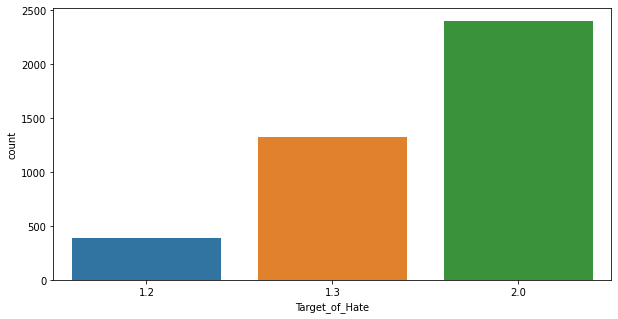

In [70]:
sns.countplot(df2['Target_of_Hate'])

In [71]:
df2['Target_of_Hate'] = df2['Target_of_Hate'].replace([1.2],1)
df2['Target_of_Hate'] = df2['Target_of_Hate'].replace([1.3],3)
df2['Target_of_Hate'] = df2['Target_of_Hate'].replace([2.0],2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [72]:
X=df2.Post_Text
Y=df2.Target_of_Hate

Splitting data into Train and Test set

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.33, random_state=42)


Data Pre-processing

Perform some pre-processing on the data before converting it into vectors and passing it to the machine learning model.

Creating a function for pre-processing of data.

1. First, iterating through each record, and using a regular expression, we will get rid of any characters apart from alphabets.

2. Then, converting the string to lowercase as, the word “Good” is different from the word “good”.

3. Then checking for stopwords in the data and get rid of them. Stopwords are commonly used words in a sentence such as “the”, “an”, “to” etc. which do not add much value.

4. Then, performing lemmatization on each word,i.e. change the different forms of a word into a single item called a lemma.

A lemma is a base form of a word. For example, “run”, “running” and “runs” are all forms of the same lexeme, where the “run” is the lemma. Hence, we are converting all occurrences of the same lexeme to their respective lemma.

5. And, then return a corpus of processed data.

In [74]:
#object of WordNetLemmatizer
lm = WordNetLemmatizer()

In [75]:
def text_transformation(df_col):
    corpus = []
    for item in df_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))

        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus

In [76]:
corpus = text_transformation(X_train)

Creating Word Cloud to find out frequent Hate words

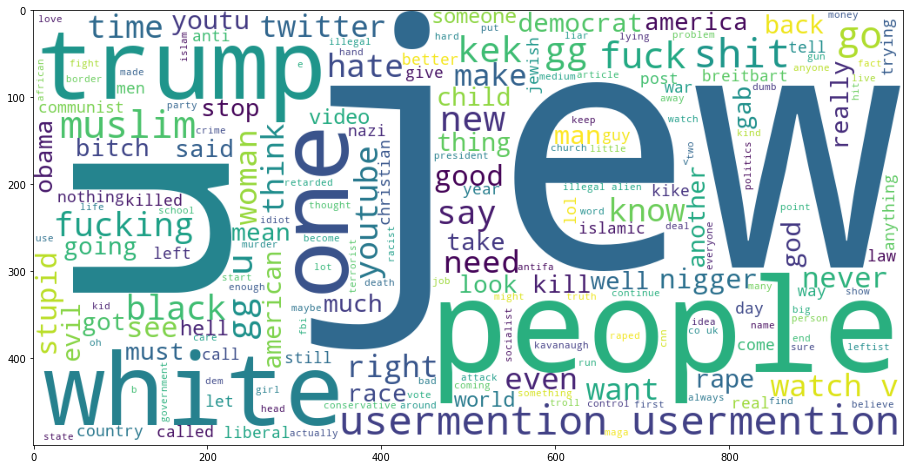

In [77]:
import matplotlib as mpl
rcp = mpl.rcParams
rcp['figure.figsize'] = 20,8
word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)

Bag of Words
Bag of Words Model(BOW), is used to represent the text in the form of a bag of words,i.e. the grammar and the order of words in a sentence are not given any importance, instead, multiplicity,i.e. (the number of times a word occurs in a document) is the main point of concern.

Basically, it describes the total occurrence of words within a document.

Scikit-Learn provides a neat way of performing the bag of words technique using CountVectorizer.

Converting the text data into vectors, by fitting and transforming the corpus that we have created.

In [78]:
cv = CountVectorizer(ngram_range=(1,2))
traindata = cv.fit_transform(corpus)
X = traindata

Model Development
#####For the machine learning model, using the XGBoost Classifier with parameter tuning.


In [79]:
xgb = XGBClassifier(objective='multi:softmax', max_depth=6, n_estimators=500, verbose=3)
xgb.fit(X,y_train)

XGBClassifier(max_depth=6, n_estimators=500, objective='multi:softprob',
              verbose=3)

Test Data Transformation
Performing the same transformations we did on training data and finally evaluate the model on its predictions.

In [80]:
#pre-processing of text
test_corpus = text_transformation(X_test)
#convert text data into vectors
testdata = cv.transform(test_corpus)
#predict the target
predictions = xgb.predict(testdata)

              precision    recall  f1-score   support

         1.0       0.32      0.07      0.12       120
         2.0       0.66      0.88      0.75       807
         3.0       0.54      0.31      0.40       433

    accuracy                           0.63      1360
   macro avg       0.51      0.42      0.42      1360
weighted avg       0.59      0.63      0.58      1360



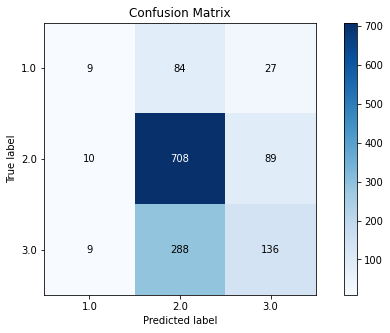

In [82]:
import matplotlib as mpl
rcp = mpl.rcParams
rcp['figure.figsize'] = 10,5
plot_confusion_matrix(y_test,predictions)
acc_score = accuracy_score(y_test,predictions)

cr = classification_report(y_test,predictions)
print(cr)



The model gives 63% accuracy for the class 'Class of Hate'

Predict for Custom Input:

In [83]:
def expression_check(prediction_input):

    if prediction_input == 1:
        print("Input statement has target of hate Individual Second Person")
    elif prediction_input == 3:
        print("Input statement has target of hate Individual Third Person.")
    elif prediction_input == 2:
        print("Input statement has target of Hate as Group.")
    else:
        print("Postive Statement.")

In [84]:
# function to take the input statement and perform the same transformations we did earlier
def sentiment_predictor(input):
    input = text_transformation(input)
    transformed_input = cv.transform(input)
    prediction = xgb.predict(transformed_input)
    expression_check(prediction)

In [136]:
input1 = ["Get rid of Nazis Demand go back to their own countries WHEN IS EVERYONE GOING TO WAKE UP"]
input2 = ["Hypocracy at it's best! How dare that lying troll point his finger at anyone!"]
input3 = ["He is stupid"]

In [135]:
sentiment_predictor(input1)
sentiment_predictor(input2)
sentiment_predictor(input3)

Input statement has target of Hate as Group.
Input statement has target of hate Individual Third Person.
Input statement has target of Hate as Group.
